# Regression with Feature Selection

In [1]:
## μισό λεπτό

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns


data2 = pd.read_csv("/home/apostolis/0. ergasia/datasets/OnlineNewsPopularity_Regression FS.txt")
X2 = data2.iloc[:,0:22]
y2 = data2.iloc[:,22]
initRows = np.shape(data2)[0]
print("Initial dataset dimensions: " + str(np.shape(data2)))

Initial dataset dimensions: (39130, 23)


<br><br>
## Training with best features

In [2]:
train, test = train_test_split(data2, test_size=0.2, random_state=42)
x_train = train.iloc[:,0:22]
y_train = train.iloc[:,22]
x_test = test.iloc[:,0:22]
y_test = test.iloc[:,22]

print(np.shape(x_train))
print(np.shape(y_train))

(31304, 22)
(31304,)


<br><br><br><br>
**Random Forest**

In [3]:
RanFor = RandomForestRegressor(random_state=42).fit(x_train, y_train)
pred = RanFor.predict(x_test)

compare = pd.DataFrame(np.transpose([y_test, pred]))
compare = compare.rename(index=str, columns={0: "Actual shares", 1: "Predicted shares"})
compare.head(10)

/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Actual shares,Predicted shares
0,2600.0,4572.2
1,870.0,1255.0
2,1200.0,4148.1
3,655.0,2746.0
4,4600.0,3660.0
5,2400.0,4540.0
6,3200.0,2061.0
7,1200.0,2496.1
8,641.0,9680.0
9,3300.0,3749.2


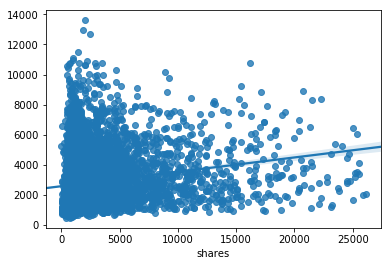

In [4]:
y_test = y_test.reset_index()
y_test = y_test.iloc[:,-1]
sns.regplot(y_test, pred)
plt.savefig("RF best.png")

In [5]:
# metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = " + str(rmse))


#counter = 0
#counter1 = 0
#counter2 = 0
#thresholdRF = 100
#thresholdRF1 = 200
#thresholdRF2 = 300

#for i in range(np.shape(pred)[0]):
 #   if np.abs(pred[i] - y_test[i]) < thresholdRF:
  #      counter = counter + 1
   # if np.abs(pred[i] - y_test[i]) < thresholdRF1:
    #    counter1 = counter1 + 1
    #if np.abs(pred[i] - y_test[i]) < thresholdRF2:
     #   counter2 = counter2 + 1

#print("Accuracy -+100 = " + str(100 * counter / np.shape(pred)[0]) + " %")
#print("Accuracy -+200 = " + str(100 * counter1 / np.shape(pred)[0]) + " %")
#print("Accuracy -+300 = " + str(100 * counter2 / np.shape(pred)[0]) + " %")

Mean Squared Error = 3330.696332080994


<br><br><br><br>
**Linear Regression**

In [6]:
# Linear Regression
LR = LinearRegression().fit(x_train, y_train)
pred = LR.predict(x_test)

compare = pd.DataFrame(np.transpose([y_test, pred]))
compare = compare.rename(index=str, columns={0: "Actual shares", 1: "Predicted shares"})
compare.head(5)

,Actual shares,Predicted shares
0,2600.0,2221.259375
1,870.0,1723.283323
2,1200.0,2008.849428
3,655.0,3385.683090
4,4600.0,2922.019356


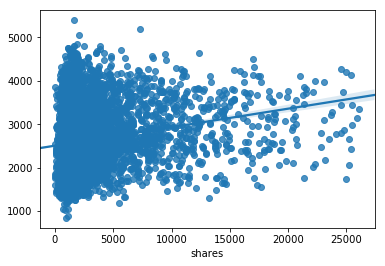

In [7]:
y_test = y_test.reset_index()
y_test = y_test.iloc[:,-1]
sns.regplot(y_test, pred)
plt.savefig("LR best.png")

In [8]:
# metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = " + str(rmse))


#counter = 0
#counter1 = 0
#counter2 = 0
#thresholdLR = 100
#thresholdLR1 = 200
#thresholdLR2 = 300

#for i in range(np.shape(pred)[0]):
 #   if np.abs(pred[i] - y_test[i]) < thresholdLR:
  #      counter = counter + 1
   # if np.abs(pred[i] - y_test[i]) < thresholdLR1:
    #    counter1 = counter1 + 1
    #if np.abs(pred[i] - y_test[i]) < thresholdLR2:
     #   counter2 = counter2 + 1

#print("Accuracy -+100 = " + str(100 * counter / np.shape(pred)[0]) + " %")
#print("Accuracy -+200 = " + str(100 * counter1 / np.shape(pred)[0]) + " %")
#print("Accuracy -+300 = " + str(100 * counter2 / np.shape(pred)[0]) + " %")

Mean Squared Error = 3132.085437036837


<br><br><br><br>
**Decision Tree**

In [9]:
DT = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
pred = DT.predict(x_test)

compare = pd.DataFrame(np.transpose([y_test, pred]))
compare = compare.rename(index=str, columns={0: "Actual shares", 1: "Predicted shares"})
compare.head(5)

,Actual shares,Predicted shares
0,2600.0,5200.0
1,870.0,1800.0
2,1200.0,1600.0
3,655.0,3000.0
4,4600.0,1400.0


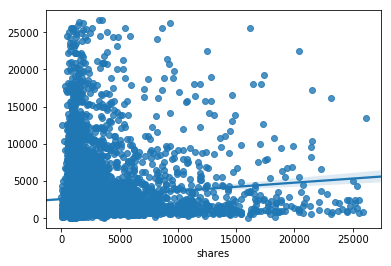

In [10]:
y_test = y_test.reset_index()
y_test = y_test.iloc[:,-1]
sns.regplot(y_test, pred)
plt.savefig("DT best.png")

In [11]:
# metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = " + str(rmse))


#counter = 0
#counter1 = 0
#counter2 = 0
#thresholdDT = 100
#thresholdDT1 = 200
#thresholdDT2 = 300

#for i in range(np.shape(pred)[0]):
 #   if np.abs(pred[i] - y_test[i]) < thresholdDT:
  #      counter = counter + 1
   # if np.abs(pred[i] - y_test[i]) < thresholdDT1:
    #    counter1 = counter1 + 1
    #if np.abs(pred[i] - y_test[i]) < thresholdDT2:
     #   counter2 = counter2 + 1

#print("Accuracy -+100 = " + str(100 * counter / np.shape(pred)[0]) + " %")
#print("Accuracy -+200 = " + str(100 * counter1 / np.shape(pred)[0]) + " %")
#print("Accuracy -+300 = " + str(100 * counter2 / np.shape(pred)[0]) + " %")

Mean Squared Error = 4662.245506894739


<br><br>
## Αποτελέσματα
<br><br>
**Results with best features**<br>
    &emsp;**Linear Regression**<br>
        &emsp;&emsp;MSE = 3132.08<br>
        &emsp;&emsp;Accuracy = 15.49 %<br>
    &emsp;**Decision Tree**<br>
        &emsp;&emsp;MSE = 4662.24<br>
        &emsp;&emsp;Accuracy = 37.99 %<br>
    &emsp;**Random Forest**<br>
        &emsp;&emsp;MSE = 3330.98<br>
        &emsp;&emsp;Accuracy = 30.62 %
<br><br>